# 숫자 순차열 데이터 예측 Template

# 데이터 준비

In [33]:
import numpy as np
import matplotlib.pyplot as plt


## 기반 숫자열 생성

숫자열이 1개라도 2차원 배열에 답는다. 

In [34]:
numbers = np.zeros((2000,1))
numbers[:,0] = np.sin(np.arange(0,1000,0.5))

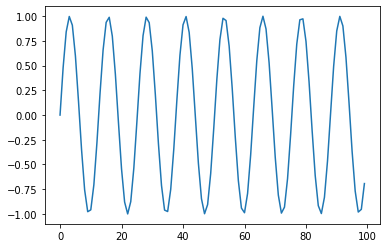

In [35]:
plt.plot(numbers[:100,0])
plt.show()

In [36]:
WINDOW_SIZE = 5
OFFSET = 1

## 입출력 데이터 생성

12345678901234567890의 숫자열로 다음의 입출력 데이터를 생성한다.
```
12345 -> 6
23456 -> 7
34567 -> 8
...
56789 -> 0
```

In [37]:
raw_x = []
raw_y = []

for i in range(len(numbers)):
  if i+WINDOW_SIZE+OFFSET >= len(numbers): break
  raw_x.append(numbers[i:i+WINDOW_SIZE,:])
  raw_y.append(numbers[i+WINDOW_SIZE+OFFSET-1,:])
#              0         1              
#              01234567890123456789
# numbers[0] = 12345678901234567890
#                 i = 3
#                 <-x->   = [3:8] = 45678
#                      y  = [8]   = 9



In [38]:
print(len(raw_x))
# len(raw_x) = 1994 = len(numbers) - WINDOW_SIZE - OFFSET = 2000 - 5 - 1

1994


## 데이터를 2차원 벡터화 하기

RNN은 2차원 입력을 전제로 한다. 다중 숫자열은 그 자체로 2차원 데이터이다. 따로 해줄 것은 없다.


In [39]:
print(raw_x[0])

[[0.        ]
 [0.47942554]
 [0.84147098]
 [0.99749499]
 [0.90929743]]


In [40]:
x = np.array(raw_x)
y = np.array(raw_y)
print(x.shape)
print(y.shape)

from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.1, shuffle=True)


print("Training Data:")
print(train_x.shape)
print(train_y.shape)

print("Test Data:")
print(test_x.shape)
print(test_y.shape)


(1994, 5, 1)
(1994, 1)
Training Data:
(1794, 5, 1)
(1794, 1)
Test Data:
(200, 5, 1)
(200, 1)


준비된 데이터는 다음과 같습니다.

train_x[0]
 [[-0.74800752]
 [-0.33824829]
 [ 0.15432591]
 [ 0.60911575]
 [ 0.9147728 ]]

train_y[0]
 [0.99646158]


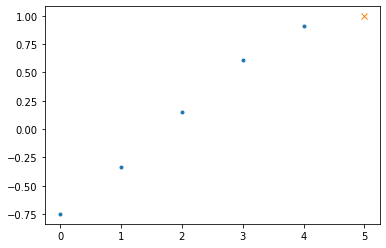

In [41]:
print("train_x[0]\n", train_x[0])
print()
print("train_y[0]\n", train_y[0])

plt.plot(train_x[0], '.')
plt.plot([len(train_x[0])], train_y[0], 'x')
plt.show()

# Template

## LSTM

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 128)               66560     
_________________________________________________________________
flatten_14 (Flatten)         (None, 128)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 129       
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


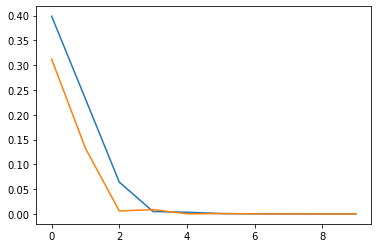

7/7 [==============================] - 0s 4ms/step - loss: 2.0827e-04 - mae: 0.0127
loss= 0.00020827427215408534
mae= 0.012711030431091785


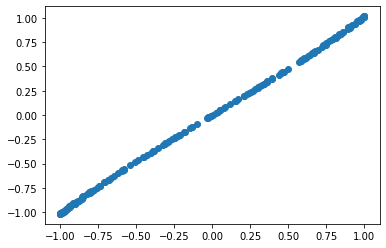

In [42]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, RepeatVector, Flatten
from tensorflow.keras.layers import Bidirectional, LSTM, GRU

input_shape = (5,1) # 수정할 곳. (윈도우 사이즈, 1)로 설정

model = keras.Sequential()

model.add(LSTM(128, input_shape=input_shape))

model.add(Flatten())
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam", metrics=["mae"])
model.summary()

history = model.fit(train_x, train_y, epochs=10, verbose=0, validation_split=0.1, batch_size=128)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)



y_ = model.predict(test_x)
plt.scatter(test_y, y_)
plt.show()

## GRU

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_4 (GRU)                  (None, 128)               50304     
_________________________________________________________________
flatten_15 (Flatten)         (None, 128)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 129       
Total params: 50,433
Trainable params: 50,433
Non-trainable params: 0
_________________________________________________________________


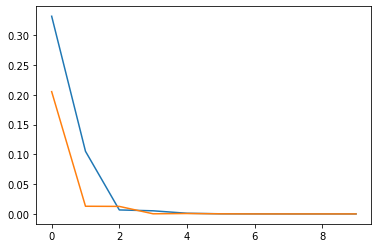

7/7 [==============================] - 0s 4ms/step - loss: 1.1313e-05 - mae: 0.0028
loss= 1.1312641618133057e-05
mae= 0.002811426529660821


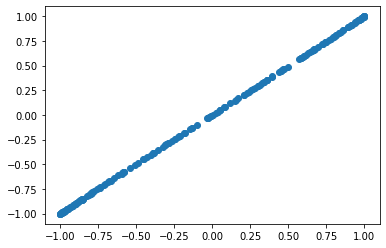

In [43]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, RepeatVector, Flatten
from tensorflow.keras.layers import Bidirectional, LSTM, GRU

input_shape = (5,1) # 수정할 곳. (윈도수 사이즈, 1)로 설정

model = keras.Sequential()

model.add(GRU(128, input_shape=input_shape))

model.add(Flatten())
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam", metrics=["mae"])
model.summary()

history = model.fit(train_x, train_y, epochs=10, verbose=0, validation_split=0.1, batch_size=128)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)



y_ = model.predict(test_x)
plt.scatter(test_y, y_)
plt.show()

## Bidirectional + LSTM

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_4 (Bidirection (None, 256)               133120    
_________________________________________________________________
flatten_16 (Flatten)         (None, 256)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 257       
Total params: 133,377
Trainable params: 133,377
Non-trainable params: 0
_________________________________________________________________


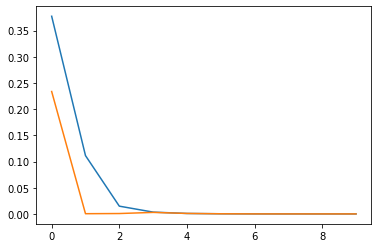

7/7 [==============================] - 0s 4ms/step - loss: 4.4181e-05 - mae: 0.0059
loss= 4.418130629346706e-05
mae= 0.005929014179855585


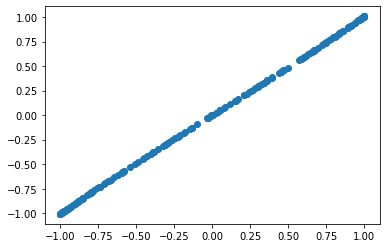

In [44]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, RepeatVector, Flatten
from tensorflow.keras.layers import Bidirectional, LSTM, GRU

input_shape = (5,1) # 수정할 곳. (윈도수 사이즈, 1)로 설정

model = keras.Sequential()

model.add(Bidirectional(LSTM(128), input_shape=input_shape))

model.add(Flatten())
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam", metrics=["mae"])
model.summary()

history = model.fit(train_x, train_y, epochs=10, verbose=0, validation_split=0.1, batch_size=128)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)



y_ = model.predict(test_x)
plt.scatter(test_y, y_)
plt.show()

## Bidirectional + GRU

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_5 (Bidirection (None, 256)               100608    
_________________________________________________________________
flatten_17 (Flatten)         (None, 256)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 257       
Total params: 100,865
Trainable params: 100,865
Non-trainable params: 0
_________________________________________________________________


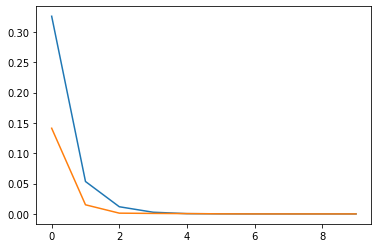

7/7 [==============================] - 0s 4ms/step - loss: 1.0661e-06 - mae: 8.9755e-04
loss= 1.0661475471351878e-06
mae= 0.00089754827786237


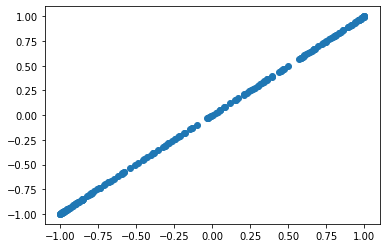

In [45]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, RepeatVector, Flatten
from tensorflow.keras.layers import Bidirectional, LSTM, GRU

input_shape = (5,1) # 수정할 곳. (윈도수 사이즈, 1)로 설정

model = keras.Sequential()

model.add(Bidirectional(GRU(128), input_shape=input_shape))

model.add(Flatten())
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam", metrics=["mae"])
model.summary()

history = model.fit(train_x, train_y, epochs=10, verbose=0, validation_split=0.1, batch_size=128)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)



y_ = model.predict(test_x)
plt.scatter(test_y, y_)
plt.show()

## stacked

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 5, 128)            66560     
_________________________________________________________________
lstm_13 (LSTM)               (None, 128)               131584    
_________________________________________________________________
flatten_18 (Flatten)         (None, 128)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 129       
Total params: 198,273
Trainable params: 198,273
Non-trainable params: 0
_________________________________________________________________


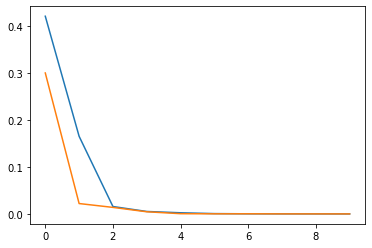

7/7 [==============================] - 0s 4ms/step - loss: 3.9025e-04 - mae: 0.0168
loss= 0.0003902506432496011
mae= 0.016789810732007027


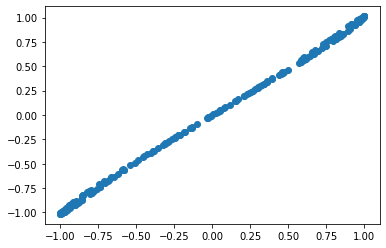

In [46]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, RepeatVector, Flatten
from tensorflow.keras.layers import Bidirectional, LSTM, GRU

input_shape = (5,1) # 수정할 곳. (윈도수 사이즈, 1)로 설정

model = keras.Sequential()

model.add(LSTM(128, input_shape=input_shape, return_sequences=True))
model.add(LSTM(128))

model.add(Flatten())
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam", metrics=["mae"])
model.summary()

history = model.fit(train_x, train_y, epochs=10, verbose=0, validation_split=0.1, batch_size=128)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)



y_ = model.predict(test_x)
plt.scatter(test_y, y_)
plt.show()

## CNN

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_12 (Conv1D)           (None, 5, 32)             128       
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 5, 32)             3104      
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 2, 32)             0         
_________________________________________________________________
conv1d_14 (Conv1D)           (None, 2, 32)             3104      
_________________________________________________________________
conv1d_15 (Conv1D)           (None, 2, 32)             3104      
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_19 (Flatten)         (None, 32)              

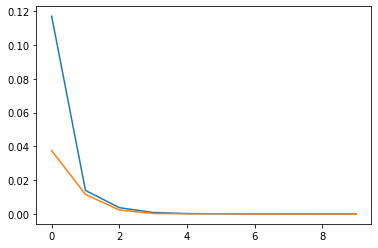

7/7 [==============================] - 0s 3ms/step - loss: 4.9349e-06 - mae: 0.0018
loss= 4.934920070809312e-06
mae= 0.0017571114003658295


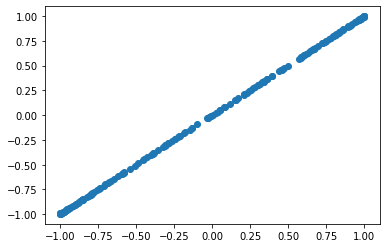

In [47]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, RepeatVector, Flatten
from tensorflow.keras.layers import Bidirectional, LSTM, GRU
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Conv1D, MaxPooling1D, Input, Reshape


input_shape = (5,1) # 수정할 곳. (윈도수 사이즈, 1)로 설정

model = keras.Sequential()

model.add(Conv1D(32, 3, padding="same", input_shape=input_shape))
model.add(Conv1D(32, 3, padding="same"))
model.add(MaxPooling1D())
model.add(Conv1D(32, 3, padding="same"))
model.add(Conv1D(32, 3, padding="same"))
model.add(MaxPooling1D())

model.add(Flatten())
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam", metrics=["mae"])
model.summary()

history = model.fit(train_x, train_y, epochs=10, verbose=0, validation_split=0.1, batch_size=128)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)



y_ = model.predict(test_x)
plt.scatter(test_y, y_)
plt.show()

## CNN + LSTM

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_16 (Conv1D)           (None, 5, 32)             128       
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 5, 32)             3104      
_________________________________________________________________
lstm_14 (LSTM)               (None, 128)               82432     
_________________________________________________________________
flatten_20 (Flatten)         (None, 128)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 129       
Total params: 85,793
Trainable params: 85,793
Non-trainable params: 0
_________________________________________________________________


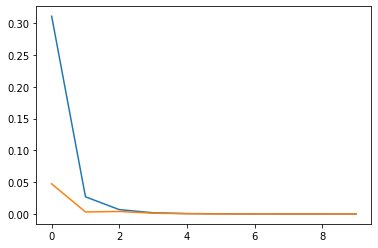

7/7 [==============================] - 0s 3ms/step - loss: 1.2300e-05 - mae: 0.0031
loss= 1.2300107300688978e-05
mae= 0.0031161021906882524


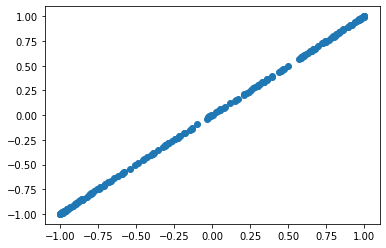

In [48]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, RepeatVector, Flatten
from tensorflow.keras.layers import Bidirectional, LSTM, GRU
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Conv1D, MaxPooling1D, Input, Reshape

input_shape = (5,1) # 수정할 곳. (윈도수 사이즈, 1)로 설정

model = keras.Sequential()

model.add(Conv1D(32, 3, padding="same", input_shape=input_shape))
model.add(Conv1D(32, 3, padding="same"))
model.add(LSTM(128))

model.add(Flatten())
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam", metrics=["mae"])
model.summary()

history = model.fit(train_x, train_y, epochs=10, verbose=0, validation_split=0.1, batch_size=128)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)



y_ = model.predict(test_x)
plt.scatter(test_y, y_)
plt.show()